#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

#Loading Dataset

In [2]:
#loading data
df = pd.read_csv("heartfailure.csv")

# Question 1. Exploratory Data Analysis (EDA)

## 1.1 Data Size and the Number of variables

In [ ]:
# Checking for the head of data top 5 rows
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# Checking the Size of the data (rows x columns)
df.shape

(299, 13)

In [ ]:
#Checking for Data Types of Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB



*   Sex - Gender of patient Male = 1, Female =0
*   Age - Age of patient
*   Diabetes - 0 = No, 1 = Yes

*   Anaemia - 0 = No, 1 = Yes
*   High_blood_pressure - 0 = No, 1 = Yes


*   Smoking - 0 = No, 1 = Yes

*   DEATH_EVENT - 0 = No, 1 = Yes













## 1.2 check if there’s any data missing

In [ ]:
# Count the number of null values in each column
print("\nCount of null values in each column:")
print(df.isnull().sum())


Count of null values in each column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


## 1.3 Descriptive Statistical Analysis

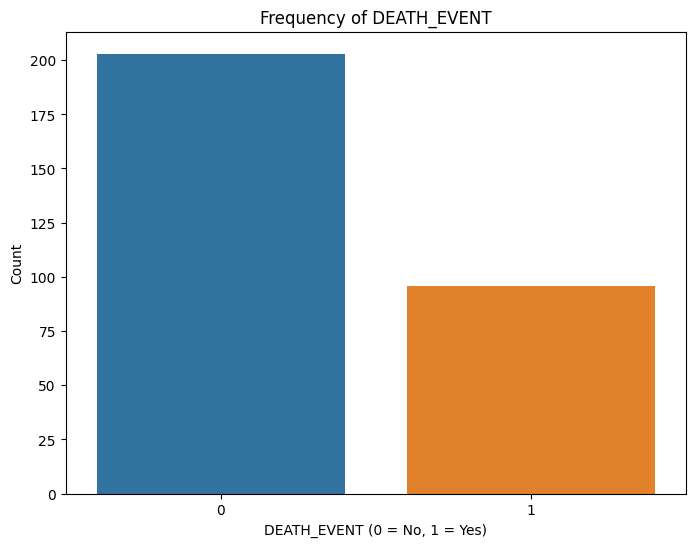

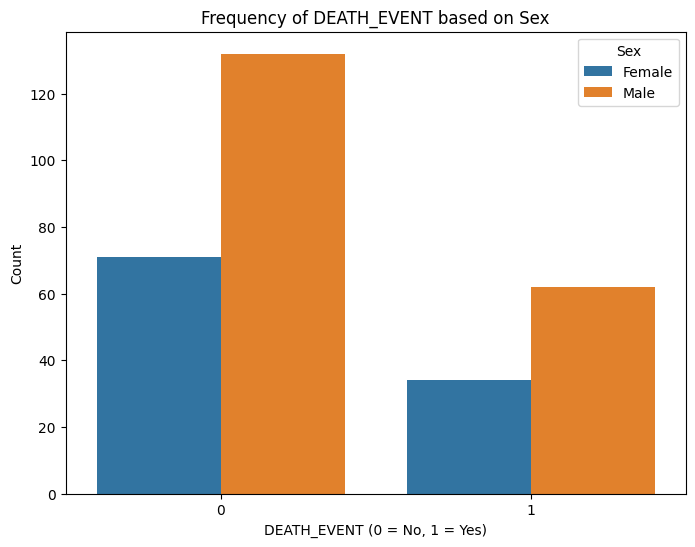

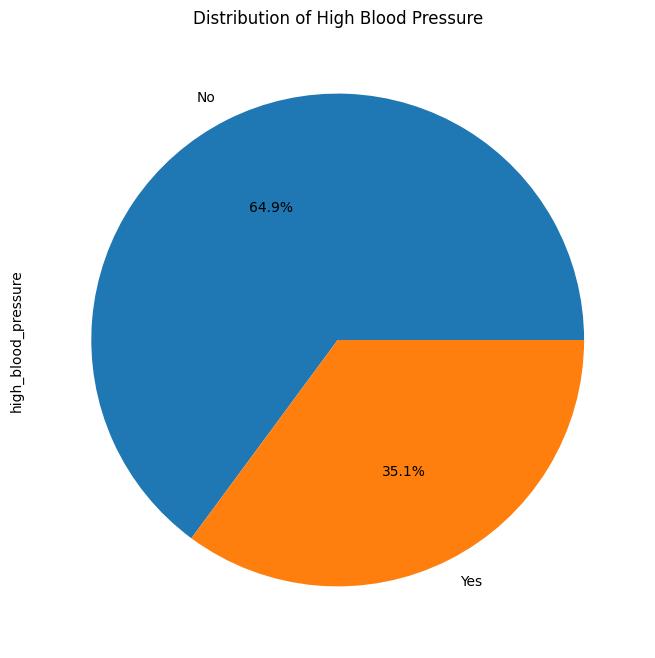

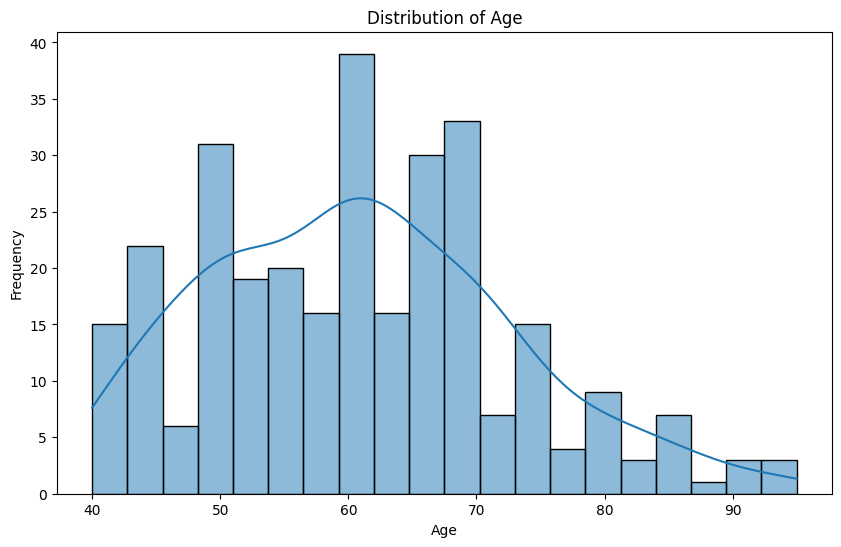

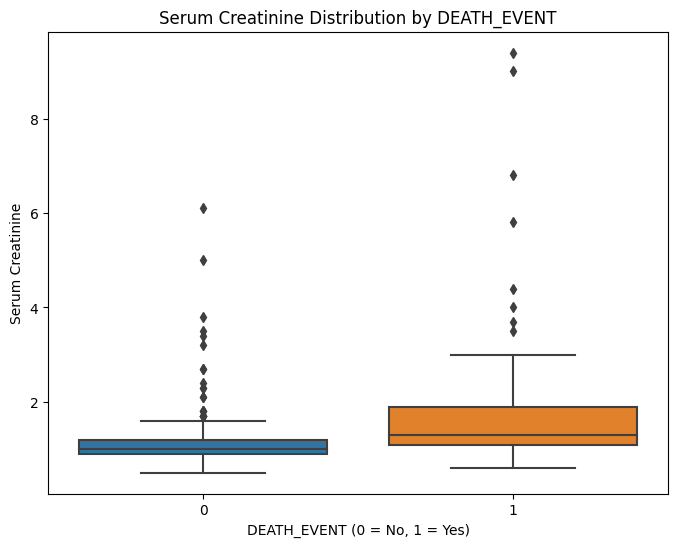

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
# Example DataFrame creation:
# df = pd.read_csv("your_dataset.csv")

# Bar plot for the frequency of DEATH_EVENT
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Frequency of DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Grouped bar plot for the frequency of DEATH_EVENT based on sex
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', hue='sex', data=df)
plt.title('Frequency of DEATH_EVENT based on Sex')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# Pie chart for the distribution of high_blood_pressure
plt.figure(figsize=(8, 8))
df['high_blood_pressure'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Distribution of High Blood Pressure')
plt.show()

# Distribution of age using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for serum_creatinine
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Serum Creatinine Distribution by DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = No, 1 = Yes)')
plt.ylabel('Serum Creatinine')
plt.show()


Descriptive Statistics:
              age  ejection_fraction  serum_creatinine         sex    smoking
count  299.000000         299.000000         299.00000  299.000000  299.00000
mean    60.833893          38.083612           1.39388    0.648829    0.32107
std     11.894809          11.834841           1.03451    0.478136    0.46767
min     40.000000          14.000000           0.50000    0.000000    0.00000
25%     51.000000          30.000000           0.90000    0.000000    0.00000
50%     60.000000          38.000000           1.10000    1.000000    0.00000
75%     70.000000          45.000000           1.40000    1.000000    1.00000
max     95.000000          80.000000           9.40000    1.000000    1.00000


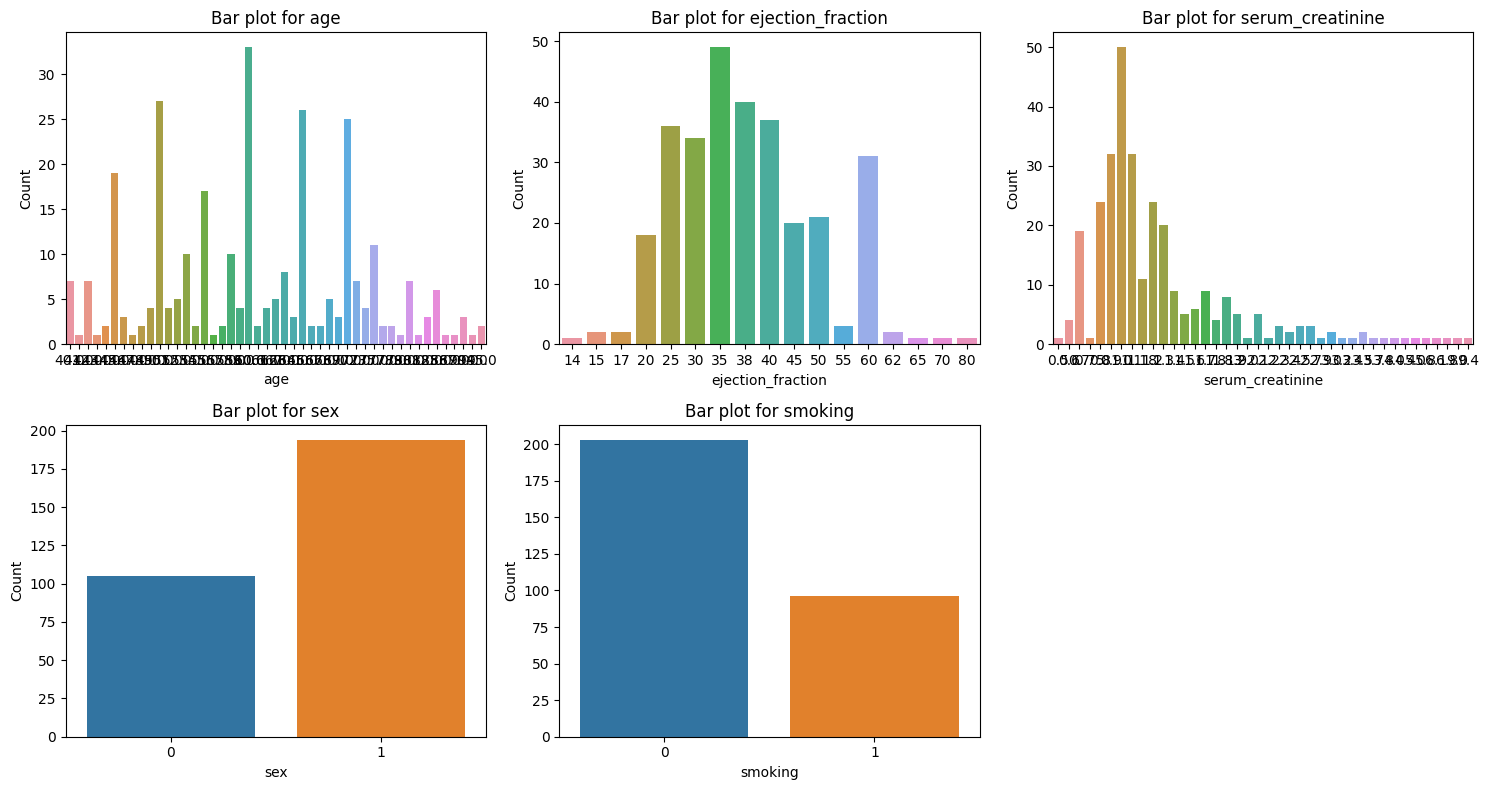

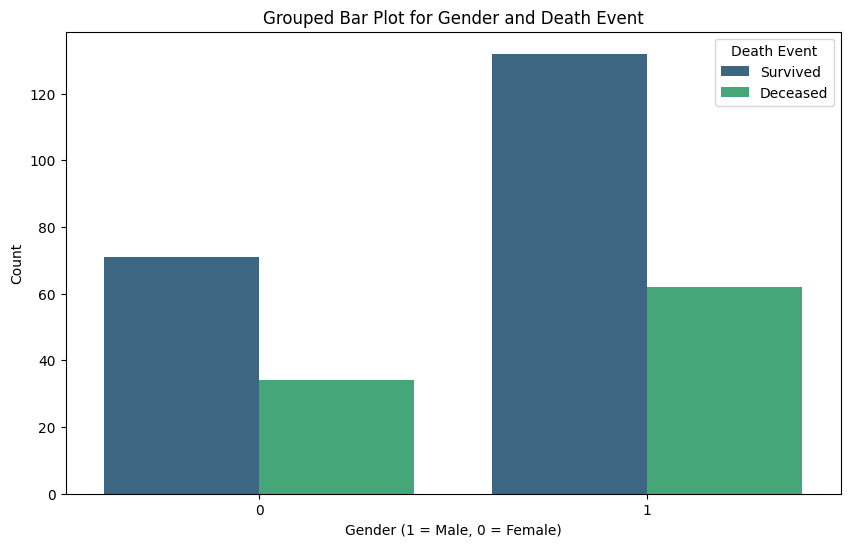

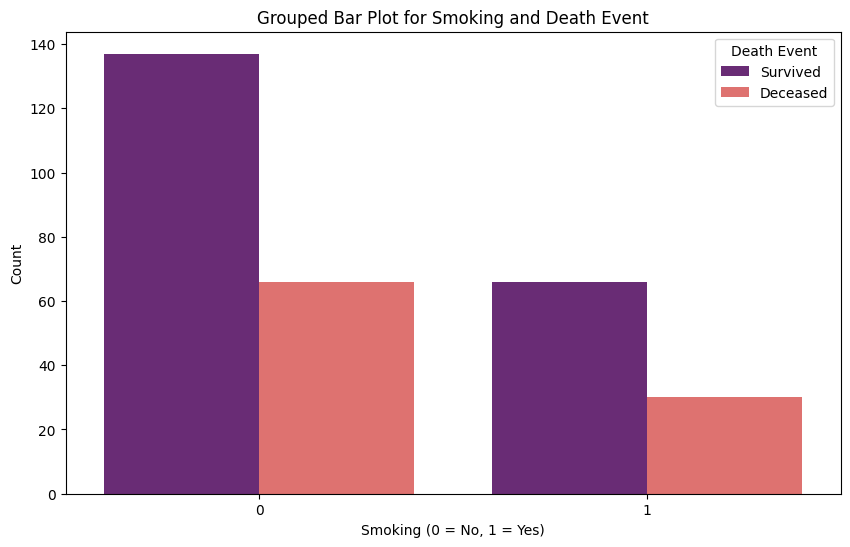

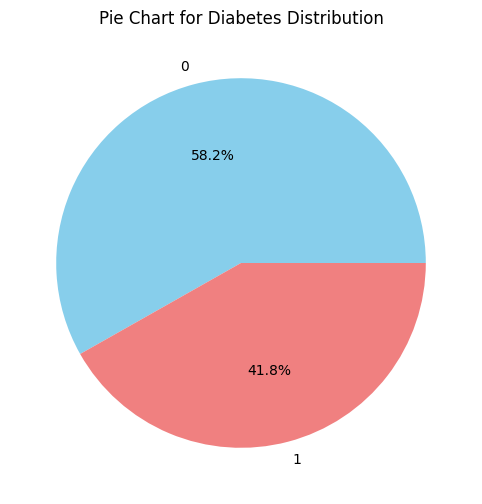

In [ ]:
# Selecting five variables of interest
selected_variables = ['age', 'ejection_fraction', 'serum_creatinine', 'sex', 'smoking']

# Descriptive statistics
print("Descriptive Statistics:")
print(df[selected_variables].describe())

# Bar plots
plt.figure(figsize=(15, 8))
for i, variable in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=variable, data=df)
    plt.title(f'Bar plot for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Grouped bar plots (e.g., comparing 'sex' and 'smoking' with 'DEATH_EVENT')
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='DEATH_EVENT', data=df, palette='viridis')
plt.title('Grouped Bar Plot for Gender and Death Event')
plt.xlabel('Gender (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='magma')
plt.title('Grouped Bar Plot for Smoking and Death Event')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()

# Pie charts (e.g., distribution of 'diabetes')
plt.figure(figsize=(10, 6))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart for Diabetes Distribution')
plt.ylabel('')
plt.show()

Descriptive Statistics:
              age  ejection_fraction  serum_creatinine
count  299.000000         299.000000         299.00000
mean    60.833893          38.083612           1.39388
std     11.894809          11.834841           1.03451
min     40.000000          14.000000           0.50000
25%     51.000000          30.000000           0.90000
50%     60.000000          38.000000           1.10000
75%     70.000000          45.000000           1.40000
max     95.000000          80.000000           9.40000


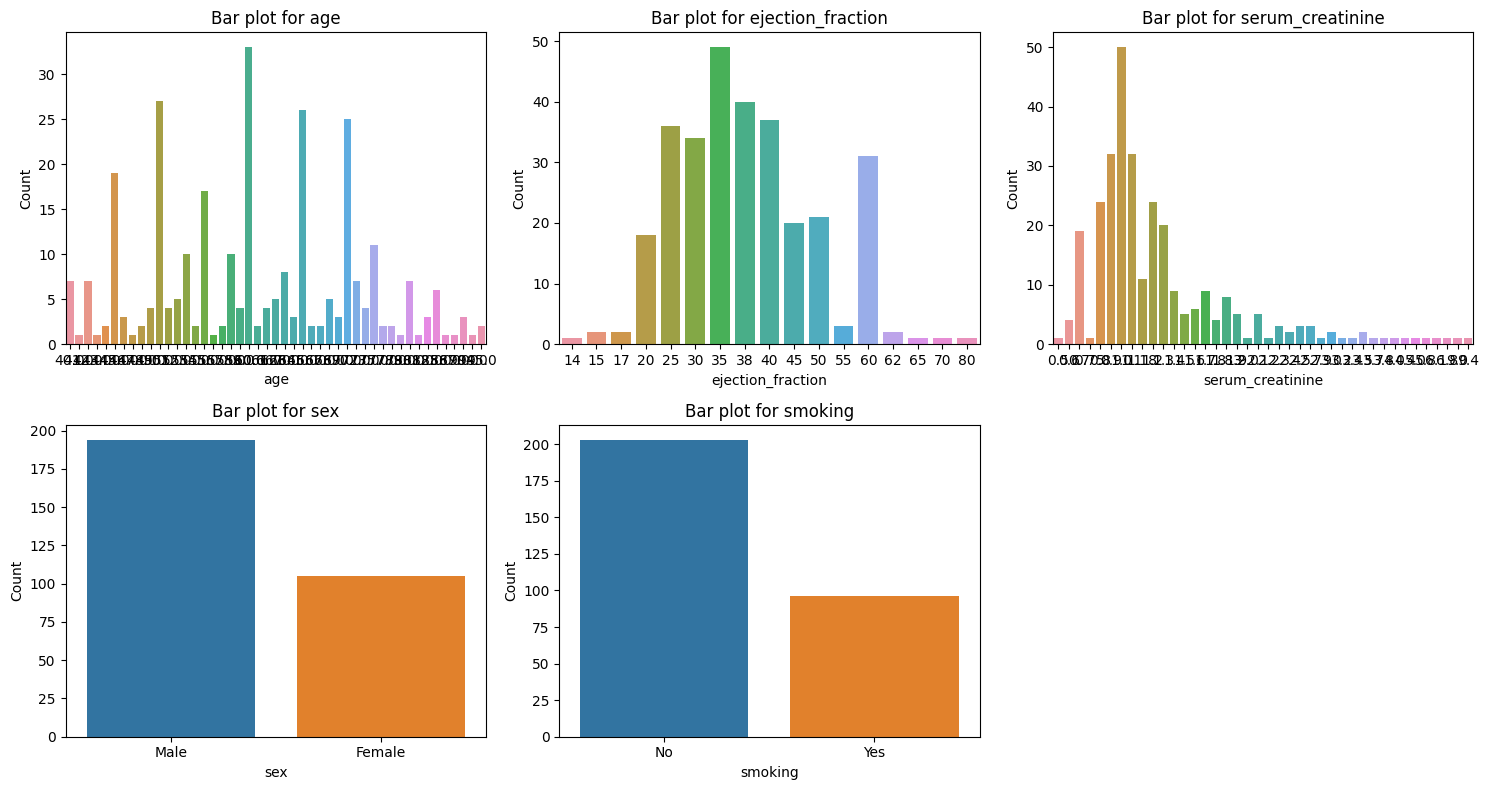

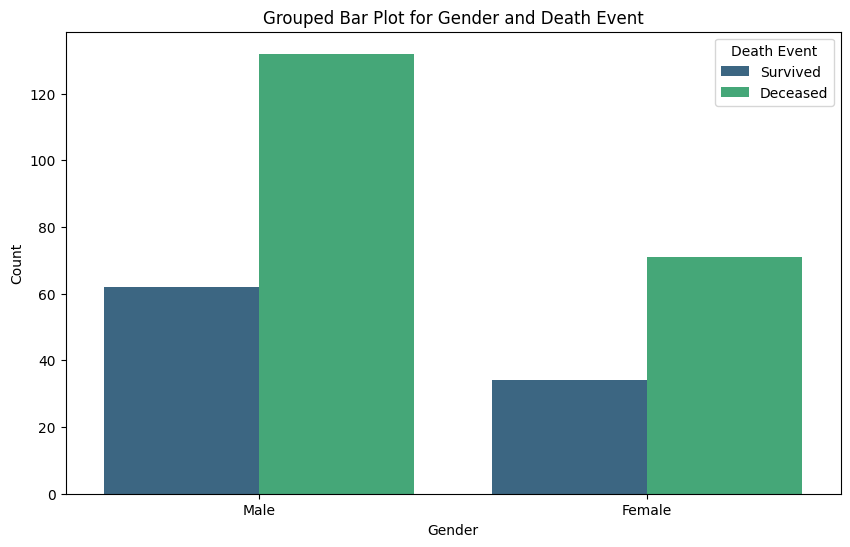

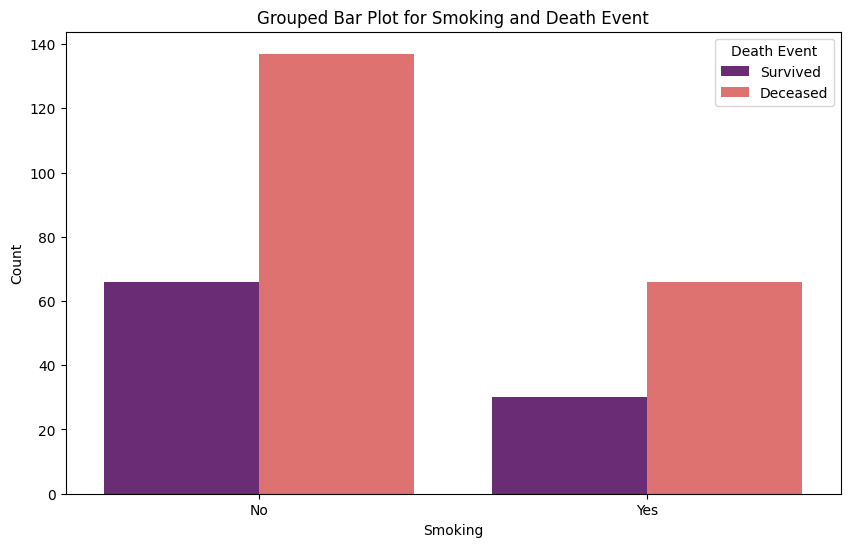

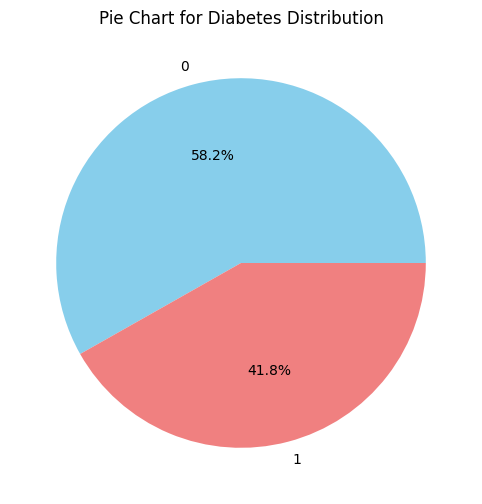

In [ ]:
# Map numeric labels to descriptive labels
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['smoking'] = df['smoking'].replace({0: 'No', 1: 'Yes'})
df['DEATH_EVENT'] = df['DEATH_EVENT'].replace({0: 'Survived', 1: 'Deceased'})

# Selecting five variables of interest
selected_variables = ['age', 'ejection_fraction', 'serum_creatinine', 'sex', 'smoking']

# Descriptive statistics
print("Descriptive Statistics:")
print(df[selected_variables].describe())

# Bar plots
plt.figure(figsize=(15, 8))
for i, variable in enumerate(selected_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=variable, data=df)
    plt.title(f'Bar plot for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Grouped bar plots
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='DEATH_EVENT', data=df, palette='viridis')
plt.title('Grouped Bar Plot for Gender and Death Event')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df, palette='magma')
plt.title('Grouped Bar Plot for Smoking and Death Event')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()

# Pie charts
plt.figure(figsize=(10, 6))
df['diabetes'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart for Diabetes Distribution')
plt.ylabel('')
plt.show()

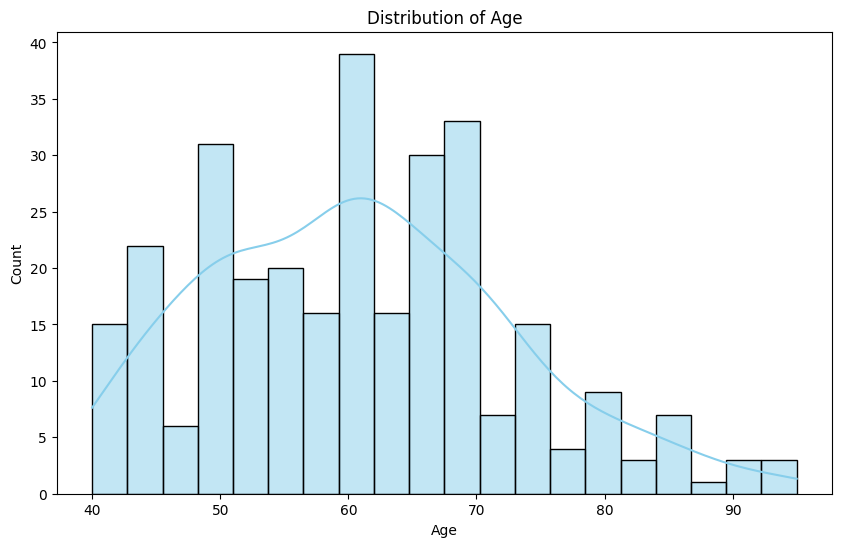

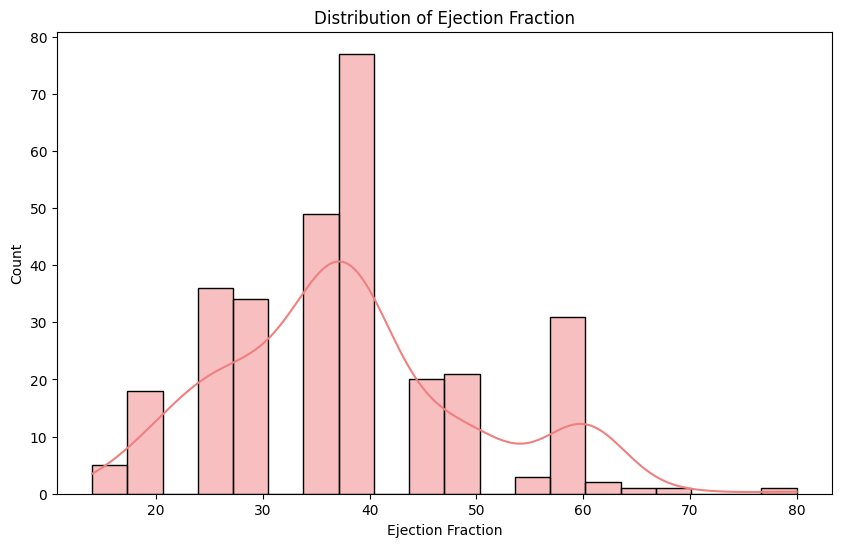

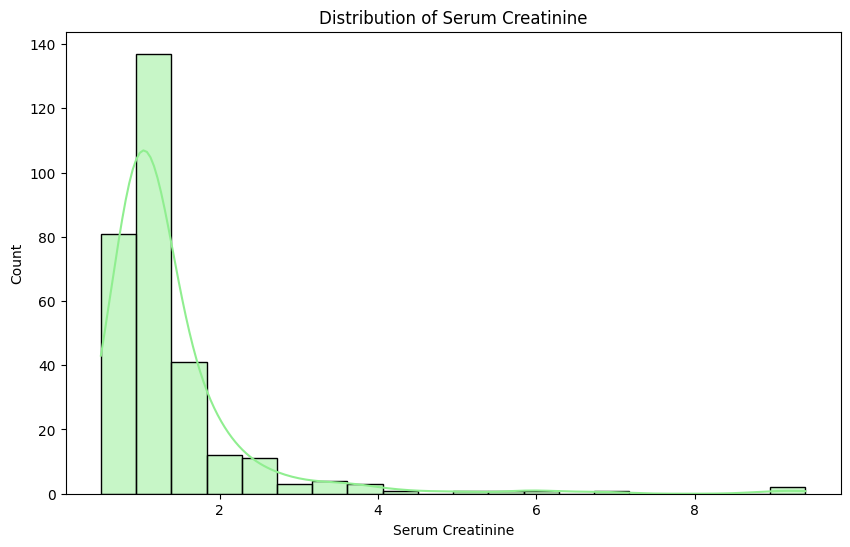

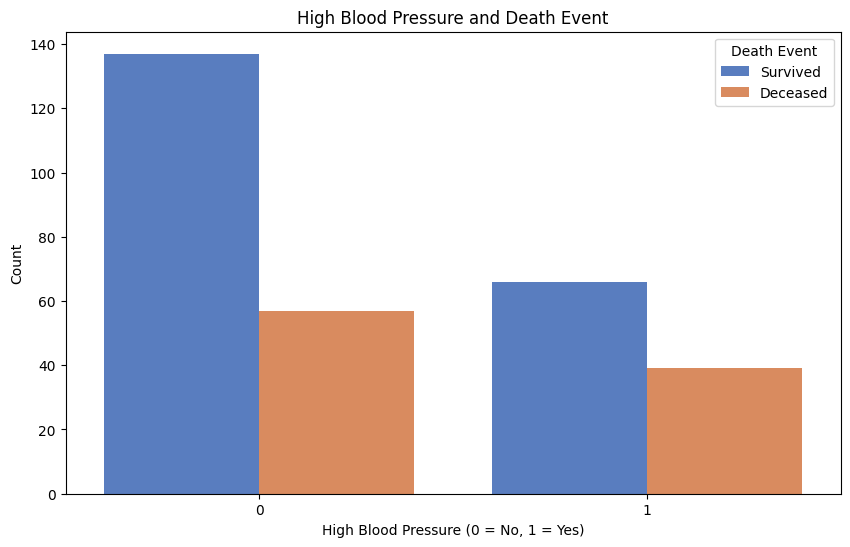

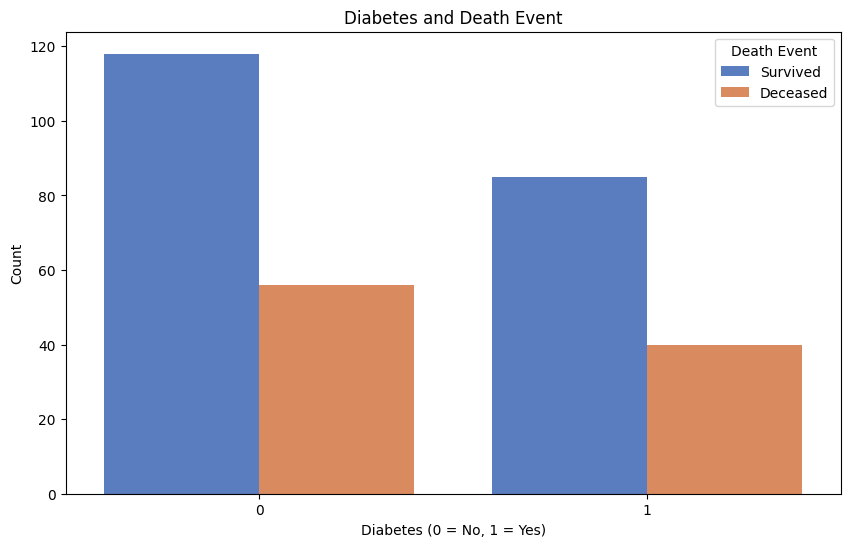

In [ ]:
# Visualizations for Important Features

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Ejection Fraction distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ejection_fraction'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Ejection Fraction')
plt.xlabel('Ejection Fraction')
plt.ylabel('Count')
plt.show()

# Serum Creatinine distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['serum_creatinine'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Serum Creatinine')
plt.xlabel('Serum Creatinine')
plt.ylabel('Count')
plt.show()

# High Blood Pressure and Death Event
plt.figure(figsize=(10, 6))
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df, palette='muted')
plt.title('High Blood Pressure and Death Event')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()

# Diabetes and Death Event
plt.figure(figsize=(10, 6))
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df, palette='muted')
plt.title('Diabetes and Death Event')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Death Event', labels=['Survived', 'Deceased'])
plt.show()


## 1.4  conclusion or observation about the data.



---



# Advance Question 1

##  A 1.1 factor analysis

In [ ]:
!pip install factor_analyzer

Factor Loadings:
                                 0         1         2
age                       0.017334  0.525939  0.247782
creatinine_phosphokinase  0.037351 -0.025423 -0.254953
ejection_fraction         0.260705  0.011088  0.217619
platelets                 0.095009 -0.057913 -0.008252
serum_creatinine         -0.201059  0.284870  0.070789
serum_sodium              0.770125 -0.067813 -0.108216
time                      0.084886 -0.475797  0.101450


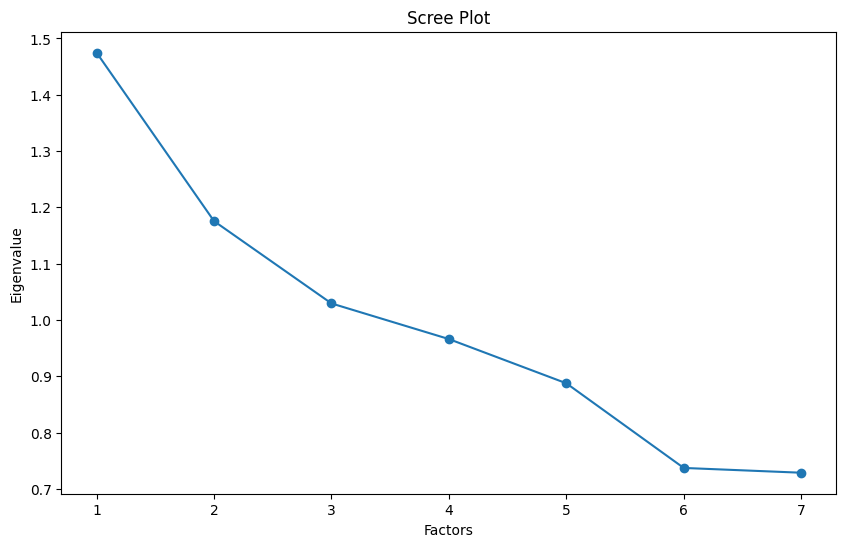

In [ ]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Example DataFrame creation:
# df = pd.DataFrame({ ... })  # Ensure that your DataFrame is properly loaded

# Extract relevant columns for factor analysis
columns_for_factor_analysis = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
                                'serum_creatinine', 'serum_sodium', 'time']

# Subset the DataFrame with the selected columns
df_factor_analysis = df[columns_for_factor_analysis]

# Check for null values and handle them if necessary
# df_factor_analysis = df_factor_analysis.dropna()

# Initialize the factor analyzer with the number of factors
n_factors = 3  # You can adjust the number of factors based on your analysis
fa = FactorAnalyzer(n_factors, rotation='varimax')

# Fit the model to your data
fa.fit(df_factor_analysis)

# Get factor loadings
loadings = pd.DataFrame(fa.loadings_, index=df_factor_analysis.columns)

# Print factor loadings
print("Factor Loadings:")
print(loadings)

# Scree plot to determine the number of factors
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()


# Question 2 : Model building and training

## 2.1 Data Pre-Processing

Removing Outliers in the Dataset

In [3]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named df
# Replace df with the actual name of your DataFrame

# Function to remove outliers using z-score
def remove_outliers(df, columns):
    for column in columns:
        z_scores = stats.zscore(df[column])
        df = df[(z_scores < 3) & (z_scores > -3)]
    return df

# List of columns to remove outliers from
columns_to_remove_outliers = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                               'ejection_fraction', 'high_blood_pressure', 'platelets',
                               'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']

# Call the function to remove outliers
df = remove_outliers(df, columns_to_remove_outliers)



In [4]:
df.shape

(279, 13)

### Feature Selection

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming your DataFrame is named df
# Replace the following line with your actual DataFrame
# df = pd.read_csv('your_data.csv')

# Separate features and target variable
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model to your data
clf.fit(X, y)

# Access feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)



                     Feature  Importance
11                      time    0.342443
7           serum_creatinine    0.131187
4          ejection_fraction    0.128610
0                        age    0.090006
2   creatinine_phosphokinase    0.084283
8               serum_sodium    0.081189
6                  platelets    0.080214
1                    anaemia    0.016014
3                   diabetes    0.013948
10                   smoking    0.011361
5        high_blood_pressure    0.010389
9                        sex    0.010357


In [6]:
# Select the top k most important features (you can choose a different value for k)
k = 7
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Update your original DataFrame with only the selected features
df_selected_features = df[selected_features + ['DEATH_EVENT']]



In [7]:
df_selected_features.head()

,time,serum_creatinine,ejection_fraction,age,creatinine_phosphokinase,serum_sodium,platelets,DEATH_EVENT
0,4,1.9,20,75.0,582,130,265000.0,1
2,7,1.3,20,65.0,146,129,162000.0,1
3,7,1.9,20,50.0,111,137,210000.0,1
5,8,2.1,40,90.0,47,132,204000.0,1
6,10,1.2,15,75.0,246,137,127000.0,1


In [8]:
df = df_selected_features

In [9]:
#assigning values to features as X and target as y
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]

In [10]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,279.0,-1.018699e-16,1.001797,-1.675925,-0.760191,-0.169185,0.941387,1.974024
serum_creatinine,279.0,-3.056098e-16,1.001797,-1.302901,-0.620927,-0.279940,0.146295,4.664375
ejection_fraction,279.0,-9.550306e-17,1.001797,-2.092702,-0.691709,0.008788,0.621722,2.372963
age,279.0,1.782724e-16,1.001797,-1.777572,-0.842206,-0.076906,0.773427,2.899260
creatinine_phosphokinase,279.0,-1.273374e-17,1.001797,-0.806924,-0.637488,-0.412194,0.233896,4.352490
serum_sodium,279.0,-1.177871e-15,1.001797,-3.277278,-0.724624,0.041172,0.806968,2.849091
platelets,279.0,7.321901e-17,1.001797,-2.744706,-0.559688,0.032284,0.501172,3.326222


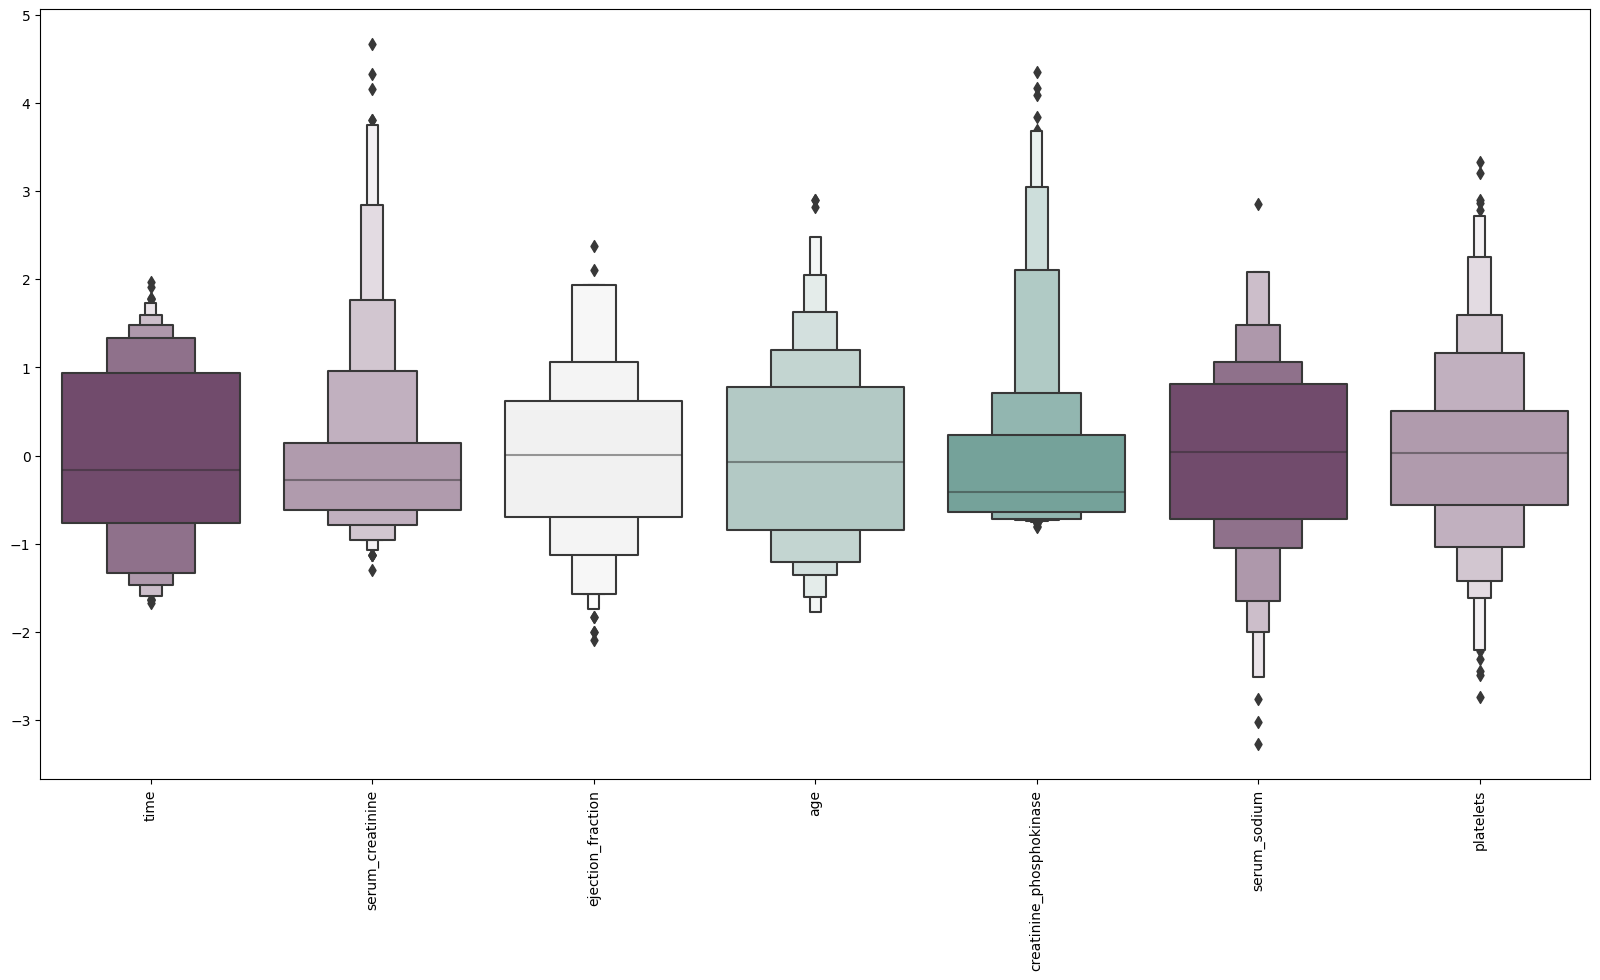

In [11]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

## 2.2 Splitting the dataset into training and testing parts

In [12]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.2,random_state=24)

## 2.3 Model Building

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the model
model = Sequential()

# Add the first hidden layer with 5 neurons and input shape matching the number of features in X
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer with 5 neurons and 'tanh' activation
model.add(Dense(5, activation='tanh'))

# Add the third hidden layer with 3 neurons and 'tanh' activation
model.add(Dense(3, activation='relu'))

# Output layer with 1 neuron and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 3)                 18        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Train the model and collect the training history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 1s 46ms/step - loss: 0.7275 - accuracy: 0.6771 - val_loss: 0.7076 - val_accuracy: 0.7679
Epoch 2/50
7/7 [==============================] - 0s 11ms/step - loss: 0.7176 - accuracy: 0.6771 - val_loss: 0.6994 - val_accuracy: 0.7679
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 0.7088 - accuracy: 0.6771 - val_loss: 0.6913 - val_accuracy: 0.7679
Epoch 4/50
7/7 [==============================] - 0s 10ms/step - loss: 0.7011 - accuracy: 0.6771 - val_loss: 0.6828 - val_accuracy: 0.7679
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6934 - accuracy: 0.6816 - val_loss: 0.6755 - val_accuracy: 0.7679
Epoch 6/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6872 - accuracy: 0.6906 - val_loss: 0.6684 - val_accuracy: 0.7679
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.6861 - val_loss: 0.6622 - val_accuracy: 0.7679
Epoch 8/50
7/7 [============

## 2.4 Evaluation Metrics

In [15]:
# Evaluate the model on the test set
eval_result = model.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Accuracy:", eval_result[1])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))


2/2 [==============================] - 0s 8ms/step - loss: 0.3402 - accuracy: 0.8393
Test Accuracy: 0.8392857313156128
2/2 [==============================] - 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.64      0.69      0.67        13

    accuracy                           0.84        56
   macro avg       0.77      0.79      0.78        56
weighted avg       0.84      0.84      0.84        56


Confusion Matrix:
[[38  5]
 [ 4  9]]


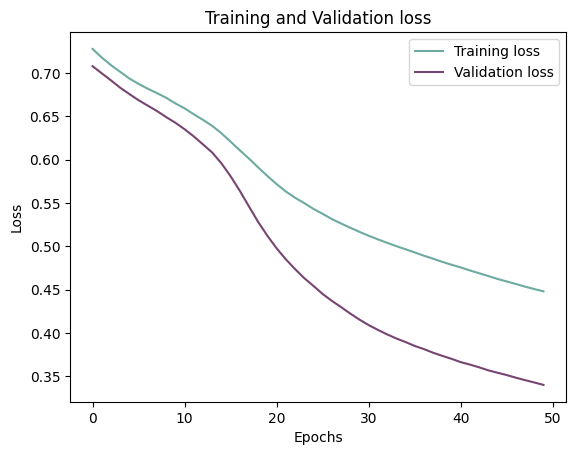

In [16]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

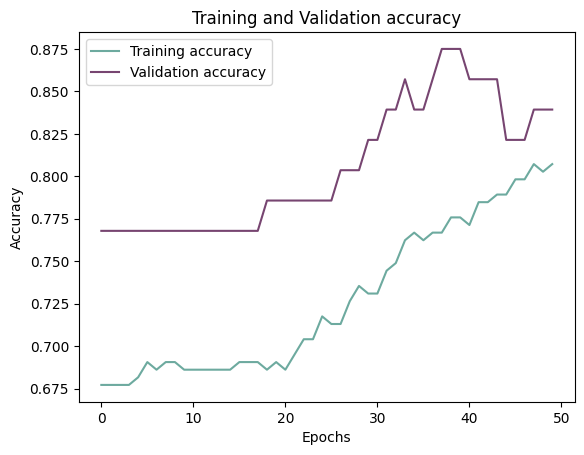

In [17]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Advance Question 2

## A 2.1 - Experimenting with parameters

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the model
model2 = Sequential()

# Add the first hidden layer with 64 neurons and input shape matching the number of features in X
model2.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
model2.add(Dropout(0.5))  # Add dropout to the first hidden layer

# Add the second hidden layer with 32 neurons and 'relu' activation
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout to the second hidden layer

# Add the third hidden layer with 16 neurons and 'relu' activation
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))  # Add dropout to the third hidden layer

# Output layer with 1 neuron and a sigmoid activation function for binary classification
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [28]:
# Train the model and collect the training history
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
7/7 [==============================] - 2s 37ms/step - loss: 0.8312 - accuracy: 0.4305 - val_loss: 0.7137 - val_accuracy: 0.3929
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.8310 - accuracy: 0.4753 - val_loss: 0.6588 - val_accuracy: 0.6786
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7834 - accuracy: 0.4798 - val_loss: 0.6162 - val_accuracy: 0.7857
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7421 - accuracy: 0.5112 - val_loss: 0.5834 - val_accuracy: 0.8214
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6981 - accuracy: 0.5785 - val_loss: 0.5559 - val_accuracy: 0.8214
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6723 - accuracy: 0.5964 - val_loss: 0.5330 - val_accuracy: 0.8214
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.5870 - accuracy: 0.6906 - val_loss: 0.5105 - val_accuracy: 0.8214
Epoch 8/50
7/7 [================

## 2.2 Evaluation Metrics

In [29]:
# Evaluate the model on the test set
eval_result2 = model2.evaluate(X_test, y_test)

# Print the evaluation results
print("Test Accuracy (model2):", eval_result2[1])

# Make predictions on the test set
y_pred2 = model2.predict(X_test)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary2 = (y_pred2 > 0.5).astype(int)

# Print the classification report
print("\nClassification Report (model2):")
print(classification_report(y_test, y_pred_binary2))

# Print the confusion matrix
print("\nConfusion Matrix (model2):")
print(confusion_matrix(y_test, y_pred_binary2))

# Print the overall accuracy
print("\nAccuracy Score (model2):", accuracy_score(y_test, y_pred_binary2))


2/2 [==============================] - 0s 8ms/step - loss: 0.2868 - accuracy: 0.8750
Test Accuracy (model2): 0.875
2/2 [==============================] - 0s 5ms/step

Classification Report (model2):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.75      0.69      0.72        13

    accuracy                           0.88        56
   macro avg       0.83      0.81      0.82        56
weighted avg       0.87      0.88      0.87        56


Confusion Matrix (model2):
[[40  3]
 [ 4  9]]

Accuracy Score (model2): 0.875


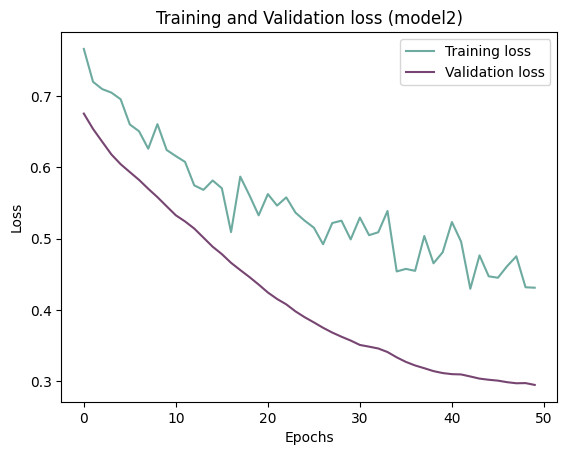

In [21]:
# Plot Training and Validation Loss for model2
history_df2 = pd.DataFrame(history2.history)

plt.plot(history_df2.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df2.loc[:, ['val_loss']], "#774571", label='Validation loss')
plt.title('Training and Validation loss (model2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

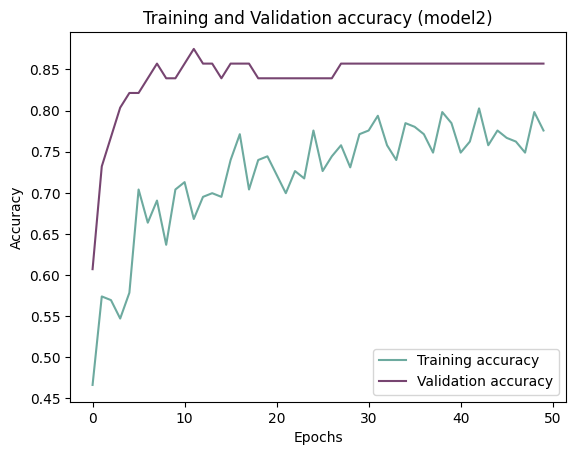

In [22]:
# Plot Training and Validation Accuracy for model2
plt.plot(history_df2.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df2.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy (model2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()